In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import csv
from decimal import Decimal
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

In [33]:
# update_method_title = r"FD6 Source Update, BDF1 Waves, and FD6 Derivatives"
# update_method_folder = "FD6_charge_BDF_wave_update_fD6_derivative"

update_method_title_fft = r"FFT Source Update, BDF1 Waves, and FFT Derivatives"
update_method_folder_fft = "FFT_charge_BDF_wave_update_FFT_derivative"

update_method_title_vanilla = r"Naive Source Interpolation, BDF1 Waves and Derivatives"
update_method_folder_vanilla = "vanilla"

# filePath = matlab.desktop.editor.getActiveFilename;
# projectRoot = fileparts(filePath);
projectRoot = pathlib.Path().resolve()

labels = []

# grid_refinement = [16,32,64]
CFLs = [1]
particle_count_multipliers = [1]
# modification = "gauge_cleaning"
modification = "no_mod"

titleFontSize = 32
tickFontSize = 28
subTickFontSize = 16
legendFontSize = 20
lineWidth = 1

for particle_count_multiplier in particle_count_multipliers:
    for CFL in CFLs:
        g128 = str(128)

        tag128 = g128 + "x" + g128

        ts_128_vanilla = []
        l2_B3_128_vanilla = []

        ts_128_fft = []
        l2_B3_128_fft = []
        
        tag_128 = str(g128) + "x" + str(g128)
        path_128 = str(projectRoot) + "/conserving/p_mult_" + str(particle_count_multiplier) + \
                "/CFL_" + str(CFL) + "/" + modification + "/" + update_method_folder_vanilla + "/" + tag128 + "/"
        csvPath_128 = path_128 + "csv_files/" + "B3_magnitude.csv"

        # Open the CSV file
        with open(csvPath_128, 'r') as file:
            # Create a CSV reader
            csv_reader = csv.reader(file)

            # N = sum(1 for row in csv_reader)

            i = 0

            # Iterate over each row in the CSV file
            for row in csv_reader:
                # Each 'row' is a list representing a row in the CSV file
                ts_128_vanilla.append(float(row[0]))
                l2_B3_128_vanilla.append(float(row[1]))
                

        path_128 = str(projectRoot) + "/conserving/p_mult_" + str(particle_count_multiplier) + \
                "/CFL_" + str(CFL) + "/" + modification + "/" + update_method_folder_fft + "/" + tag128 + "/"
        csvPath_128 = path_128 + "csv_files/" + "B3_magnitude.csv"

        # Open the CSV file
        with open(csvPath_128, 'r') as file:
            # Create a CSV reader
            csv_reader = csv.reader(file)

            i = 0

            # Iterate over each row in the CSV file
            for row in csv_reader:
                # Each 'row' is a list representing a row in the CSV file
                ts_128_fft.append(float(row[0]))
                l2_B3_128_fft.append(float(row[1]))
ts_128_vanilla = np.array(ts_128_vanilla)
ts_128_fft = np.array(ts_128_fft)


In [34]:
len(ts_128_vanilla)

10000

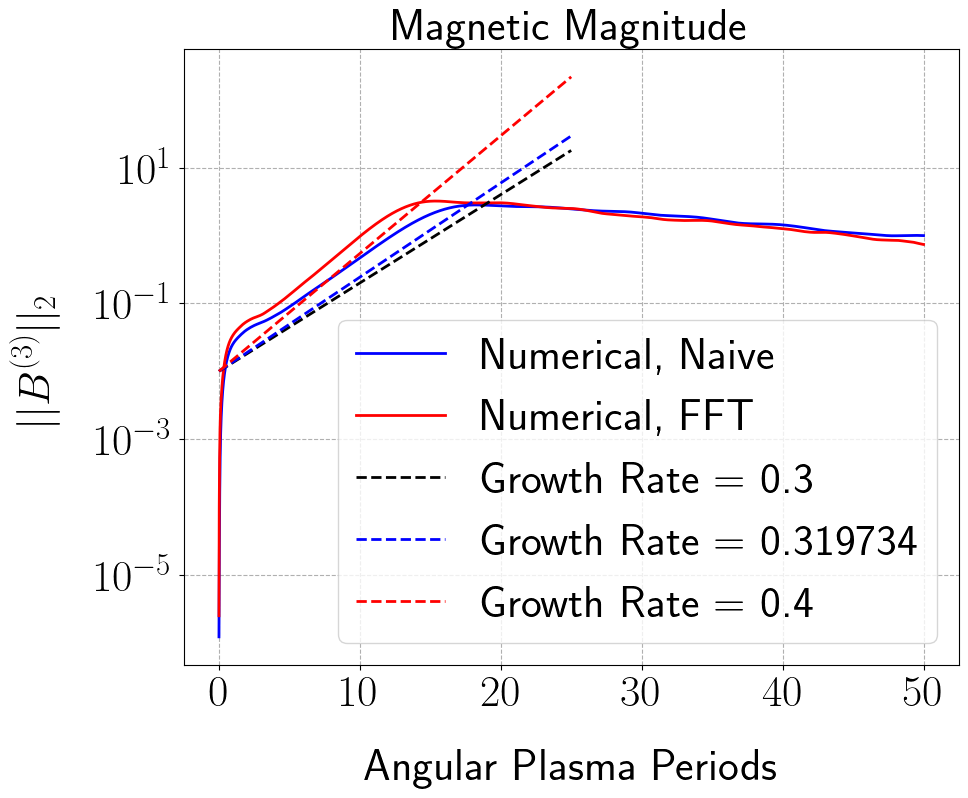

In [37]:
# Analytical solution for the growth derived from linear response theory
# shift = 5.0e-03
shift = 1e-2
t = ts_128_fft
# growth_rate = 1.4777e-1
growth_rate_comparison2 = 2e-1
growth_rate_comparison3 = 3e-1
growth_rate_comparison4 = 4e-1
growth_rate_analytical = 0.319734

growth_comparison2 = shift*np.exp(growth_rate_comparison2*t)
growth_comparison3 = shift*np.exp(growth_rate_comparison3*t)
growth_comparison4 = shift*np.exp(growth_rate_comparison4*t)
growth_analytical = shift*np.exp(growth_rate_analytical*t)

plt.figure(figsize=(10,8))
plt.semilogy(ts_128_vanilla, l2_B3_128_vanilla[:], color = "b", ls="-", lw = 2.0, label="Numerical, Naive")
plt.semilogy(ts_128_fft, l2_B3_128_fft[:], color = "r", ls="-", lw = 2.0, label="Numerical, FFT")
# plt.semilogy(t[:6000], growth_comparison2[:6000], color = "g", ls="--", lw = 2.0, label="Growth Rate = .2")
plt.semilogy(t[:5000], growth_comparison3[:5000], color = "k", ls="--", lw = 2.0, label="Growth Rate = 0.3")
plt.semilogy(t[:5000], growth_analytical[:5000], color = "b", ls="--", lw = 2.0, label="Growth Rate = 0.319734")
plt.semilogy(t[:5000], growth_comparison4[:5000], color = "r", ls="--", lw = 2.0, label="Growth Rate = 0.4")
# plt.semilogy(t[:2000], growth_analytical[:2000], color = "k", ls="--", lw = 2.0, label="Analytical = .20751")

plt.xlabel("Angular Plasma Periods", fontsize=32, labelpad=25.0)
plt.ylabel(r"$ || B^{(3)} ||_{2}$", fontsize=32, labelpad=25.0)
plt.title("Magnetic Magnitude", fontsize=32)
plt.xticks(fontsize=32)
plt.yticks(fontsize=32)
plt.legend(fontsize=32)
plt.grid(ls="--")


plt.show()

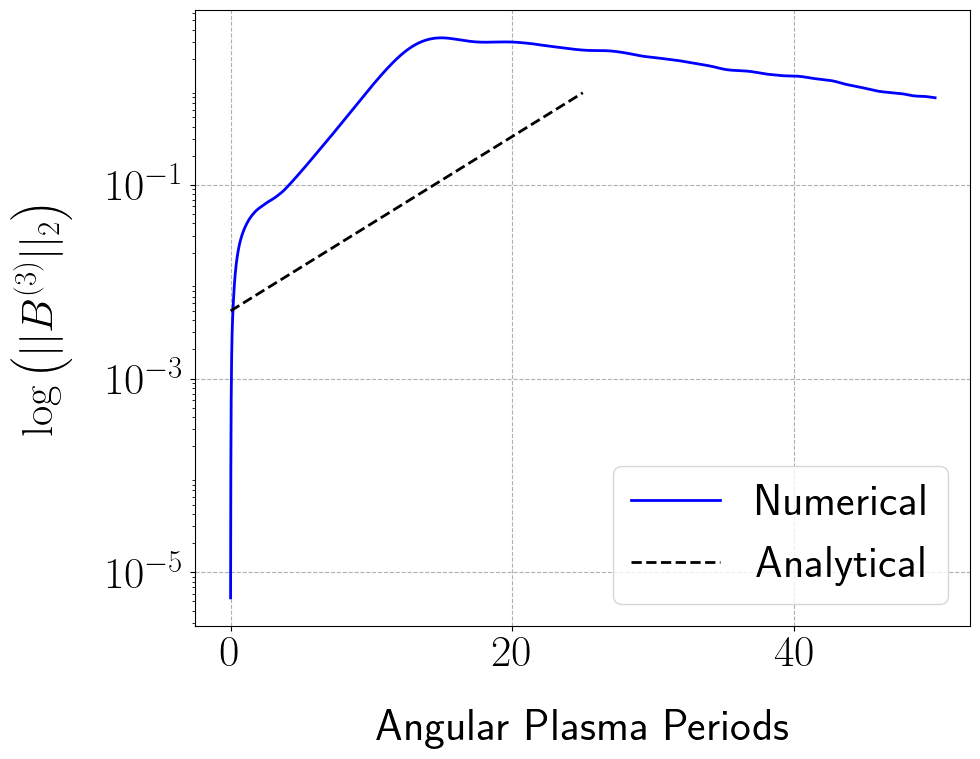

In [24]:
# Analytical solution for the growth derived from linear response theory
shift = 5.0e-03
t = ts_128_fft
growth_rate = 2.0751e-01
growth_analytical = shift*np.exp(growth_rate*t)

plt.figure(figsize=(10,8))

plt.semilogy(t[:], l2_B3_128_fft[:], color = "b", ls="-", lw = 2.0, label="Numerical, FFT")
plt.semilogy(t[:], l2_B3_128_vanilla[:], color = "r", lw = 2.0, label="Numerical, Vanilla")
plt.semilogy(t[0:4000], growth_analytical[0:4000], color = "k", ls="--", lw = 2.0, label="Analytical")

plt.xlabel("Angular Plasma Periods", fontsize=32, labelpad=25.0)
plt.ylabel(r"$\log \left( || B^{(3)} ||_{2} \right)$", fontsize=32, labelpad=25.0)
plt.xticks(ticks=[0,20,40], fontsize=32)
plt.yticks(ticks=[10**-1, 10**-3, 10**-5], fontsize=32)
plt.legend(fontsize=32)
plt.grid(ls="--")
#plt.ylim((1e-6,1e2))

# plt.savefig(base_dir + "Weibel-iaem-FFT-B3-growth.png", bbox_inches="tight")
plt.show()

/Users/stwhite/Documents/Grad_School/repos/MOLT/MOLT_Matlab/weibel_instability/results/conserving/p_mult_1/CFL_1/no_mod/FFT_charge_BDF_wave_update_FFT_derivative/magnetic_magnitude.jpg


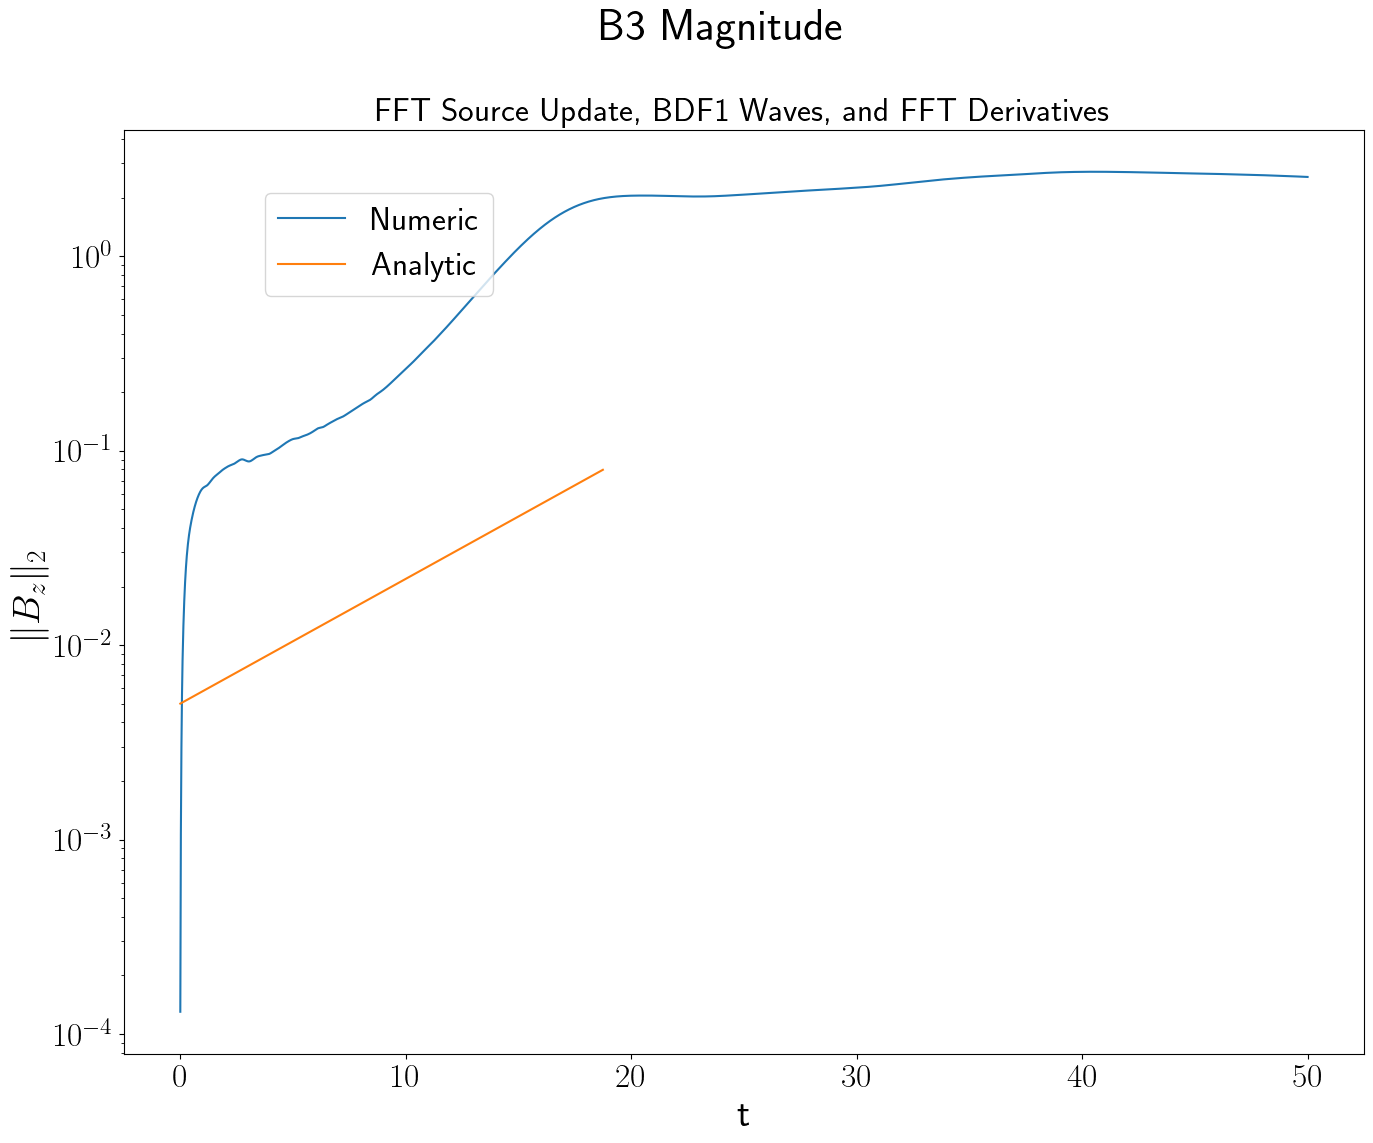

In [98]:
# Define the region to zoom in
zoom_start, zoom_end = np.searchsorted(ts_128,.05), len(ts_128)

supTitleSize = 32
labelSize = 28
tickSize = 24

# Create the main plot
plt.figure(figsize=(16, 12))
# plt.plot(x, y, label='Main Plot')
plt.semilogy(ts_128,l2_B3_128, label='Numeric')
plt.semilogy(ts_128[0:1500],growth_analytical[0:1500], label='Analytic')
plt.suptitle(r"B3 Magnitude", fontsize=supTitleSize)
plt.title(update_method_title, fontsize=24)

plt.xlabel(r"t", fontsize=labelSize)
plt.ylabel(r"$\lVert B_z \rVert_2$", fontsize=labelSize)


plt.xticks(fontsize=tickSize)
plt.yticks(fontsize=tickSize)
plt.gca().yaxis.get_offset_text().set_fontsize(tickSize)
plt.legend(fontsize="24", loc='upper left', bbox_to_anchor=(.1, .95))

figpath = str(projectRoot) + "/conserving/p_mult_" + str(particle_count_multiplier) + \
                             "/CFL_" + str(CFL) + "/" + "no_mod" + "/" + update_method_folder + "/magnetic_magnitude.jpg"
print(figpath)
plt.savefig(figpath)
plt.show()

In [9]:
figpath

'C:\\Users\\StWhite\\Documents\\stuff\\MSU\\advisor_work\\repos\\MOLT\\MOLT_Matlab\\results\\conserving\\p_mult_10\\CFL_1\\no_mod\\FD6_charge_BDF_wave_update_fD6_derivative\\64x64\\\\particle_location_t_0.5_FD6_charge_BDF_wave_update_fD6_derivative.jpg'

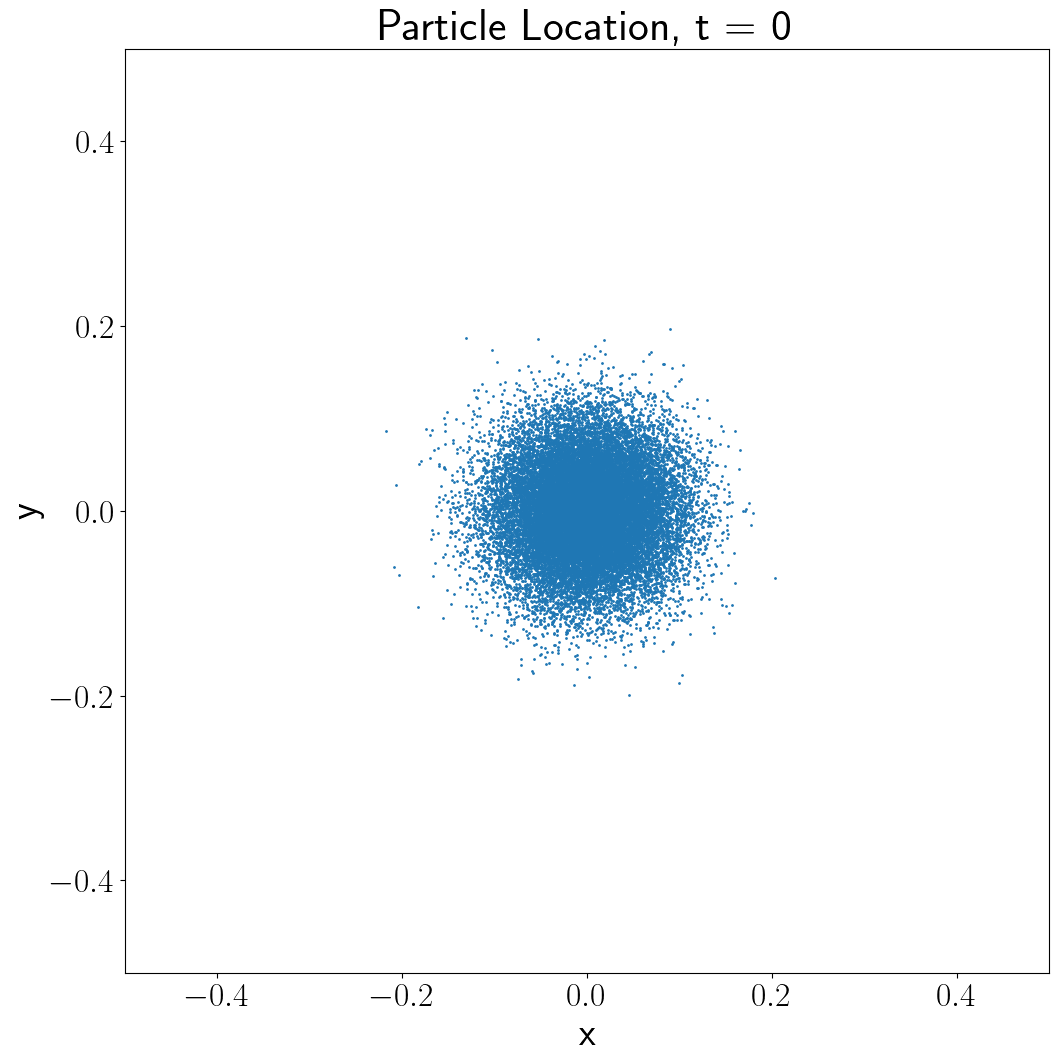

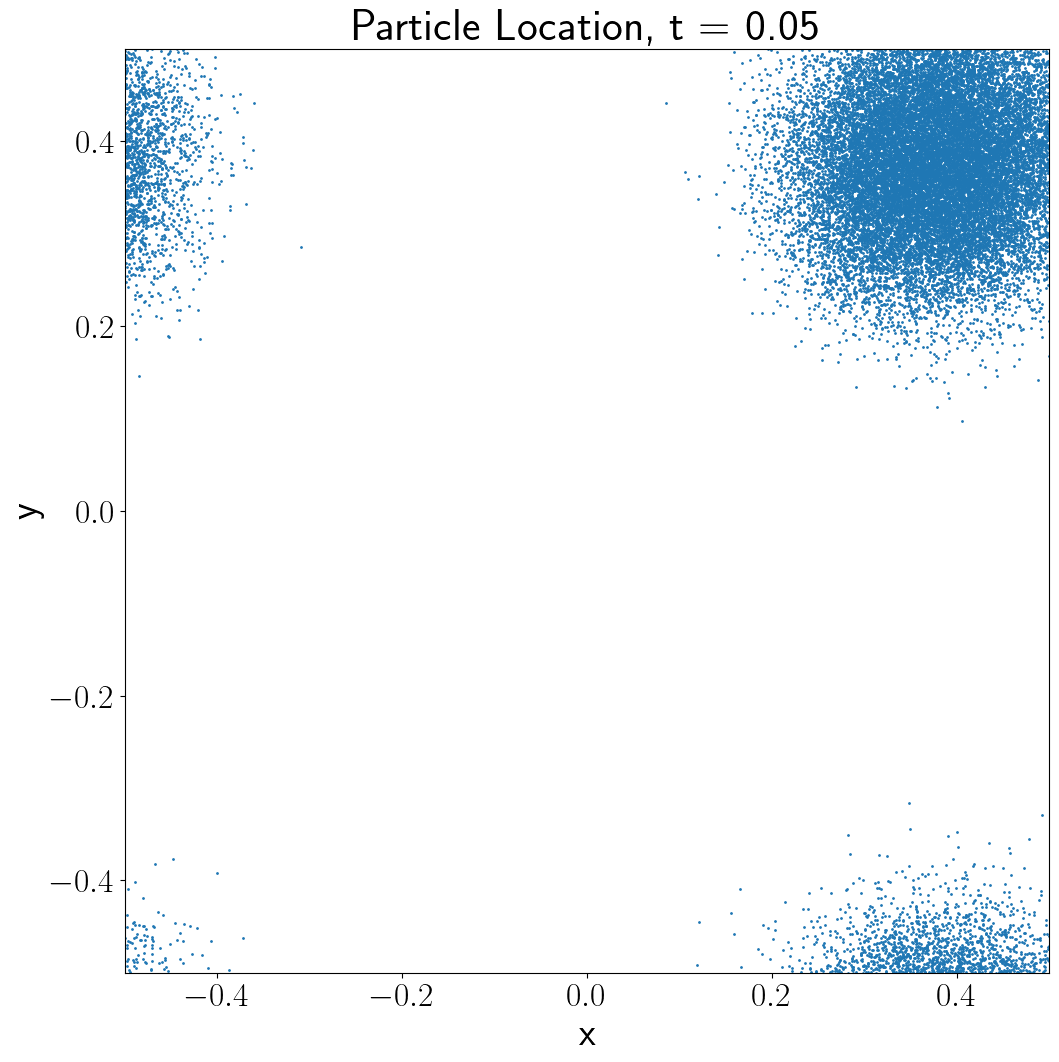

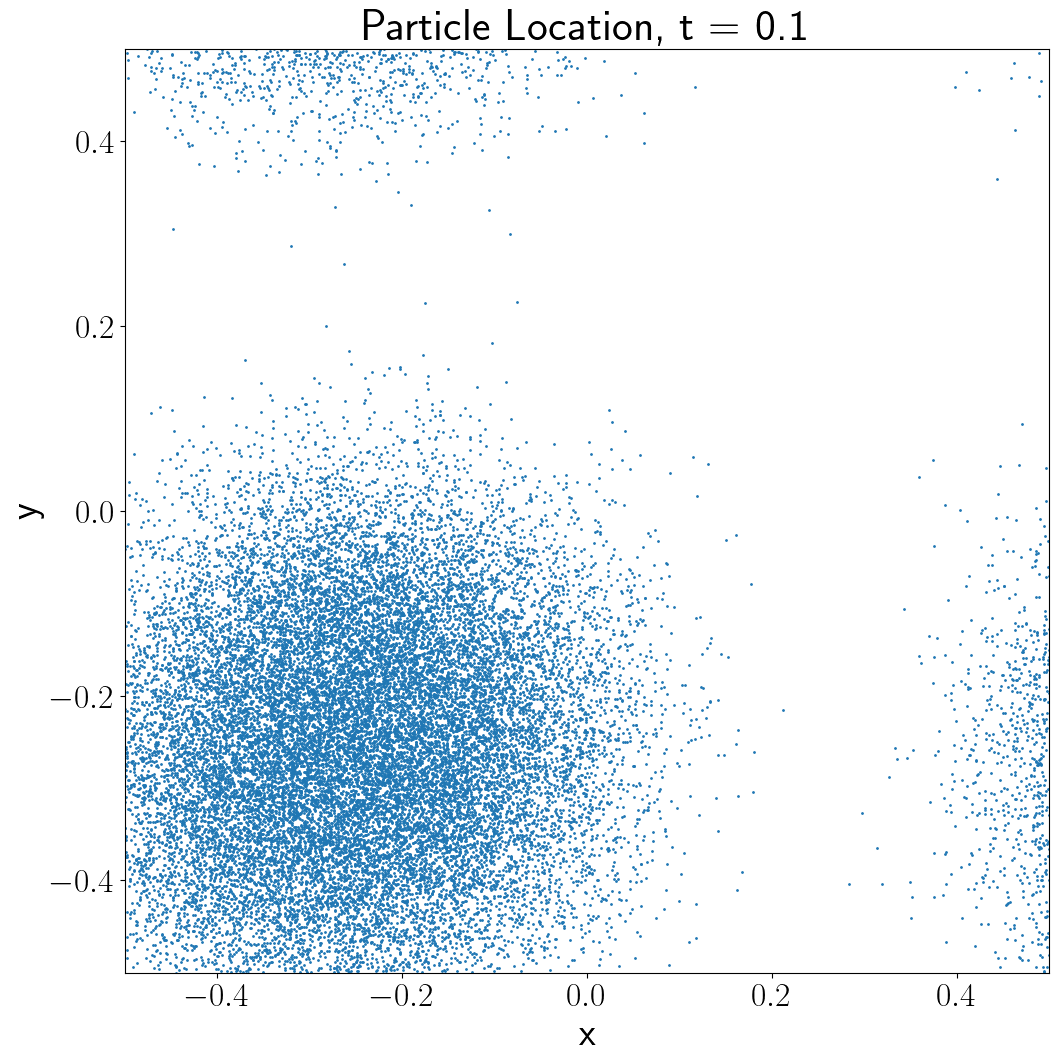

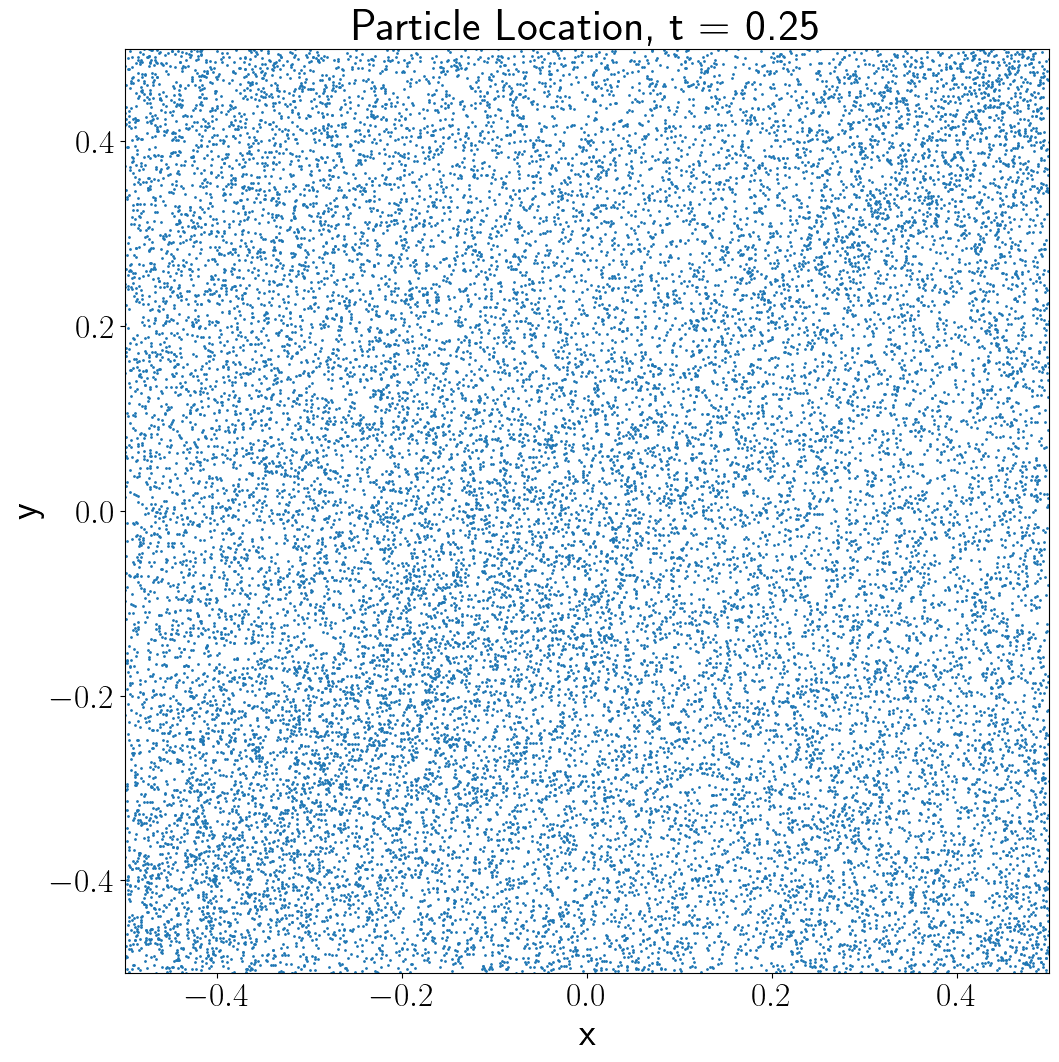

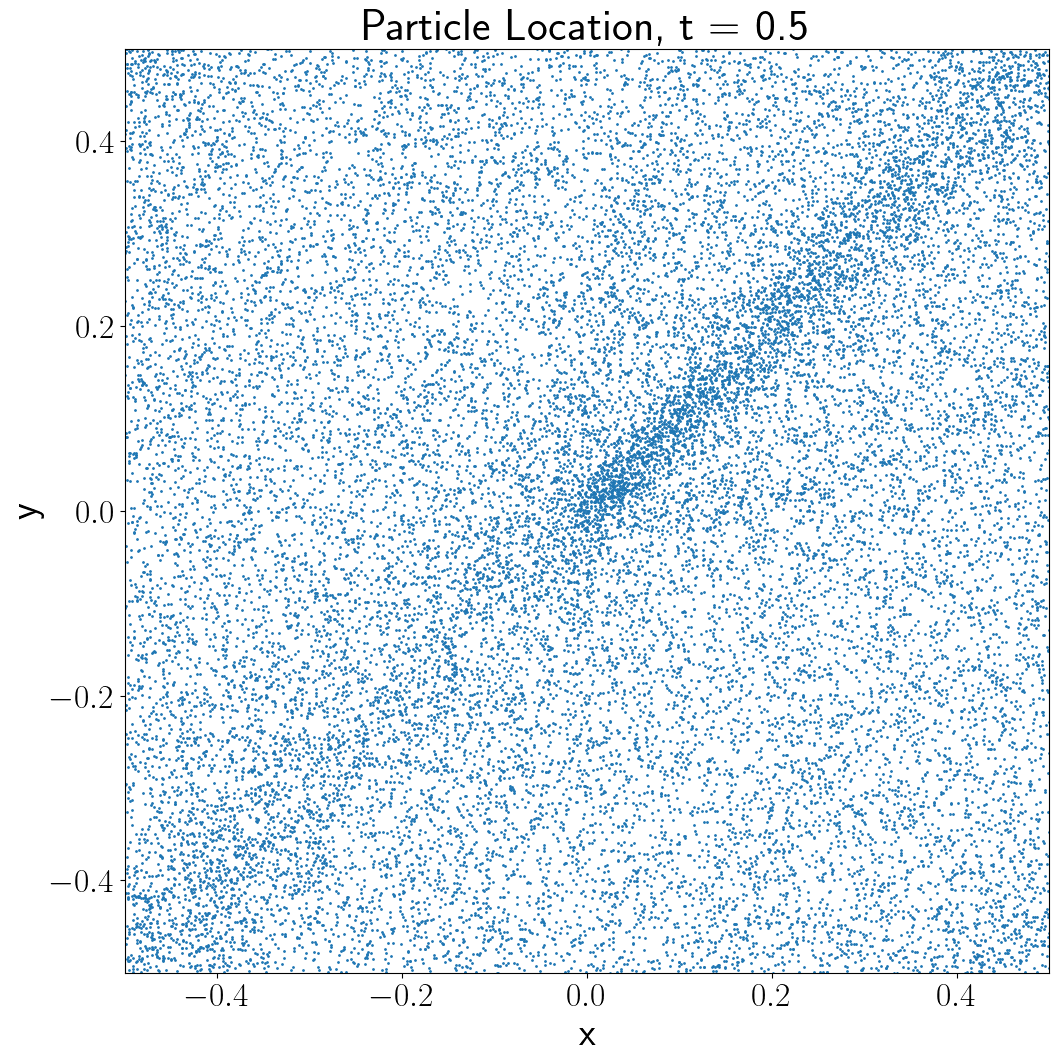

In [8]:
update_method_title = r"FD6 Source Update, BDF1 Waves, and FD6 Derivatives"
update_method_folder = "FD6_charge_BDF_wave_update_fD6_derivative"

# update_method_title = r"FFT Source Update, BDF1 Waves, and FFT Derivatives"
# update_method_folder = "FFT_charge_BDF_wave_update_FFT_derivative"

# update_method_title = "      Naive Charge Map, BDF-1 Derivative"
# update_method_folder = "vanilla"

projectRoot = pathlib.Path().resolve()

labels = []

# grid_refinement = [16,32,64]
CFL = 1
particle_count_multiplier = 10

titleFontSize = 32
tickFontSize = 28
subTickFontSize = 16
legendFontSize = 20
lineWidth = 1

steps_to_plot = [0,3500,7000,17500,34847]
times_to_plot = [0,.05,.1,.25,.5]

for idx in range(len(steps_to_plot)):
    step = steps_to_plot[idx]
    time = times_to_plot[idx]
    g64 = str(64)

    tag_64 = str(g64) + "x" + str(g64)
    path_64 = str(projectRoot) + "\\conserving\\p_mult_" + str(particle_count_multiplier) + \
            "\\CFL_" + str(CFL) + "\\" + "no_mod" + "\\" + update_method_folder + "\\" + tag_64 + "\\"
    csvPath_64 = path_64 + "csv_files\\" + "\\particles\\particles_" + str(step) + ".csv"

    particle_locations_x = []
    particle_locations_y = []

    # Open the CSV file
    with open(csvPath_64, 'r') as file:
        # Create a CSV reader
        csv_reader = csv.reader(file)

        # N = sum(1 for row in csv_reader)

        i = 0

        # Iterate over each row in the CSV file
        for row in csv_reader:
            # Each 'row' is a list representing a row in the CSV file
            particle_locations_x.append(float(row[0]))
            particle_locations_y.append(float(row[1]))
        
        plt.figure(figsize=(16, 12))
        plt.scatter(particle_locations_x,particle_locations_y,s=1)
        plt.xlim([-.5,.5])
        plt.ylim([-.5,.5])
        plt.xlabel(r"x", fontsize=labelSize)
        plt.ylabel(r"y", fontsize=labelSize)
        plt.title(r"Particle Location, t = " + str(time), fontsize=supTitleSize)

        plt.xticks(fontsize=tickSize)
        plt.yticks(fontsize=tickSize)
        plt.gca().yaxis.get_offset_text().set_fontsize(tickSize)
        plt.gca().set_aspect('equal')

        figpath = path_64 + "\\particle_location_t_" + str(time) + "_" + update_method_folder + ".jpg"

        plt.savefig(figpath)
        plt.show()


In [5]:
# n = 200
x_scatter = [float(string) for string in particle_locations_x]
y_scatter = [float(string) for string in particle_locations_y]

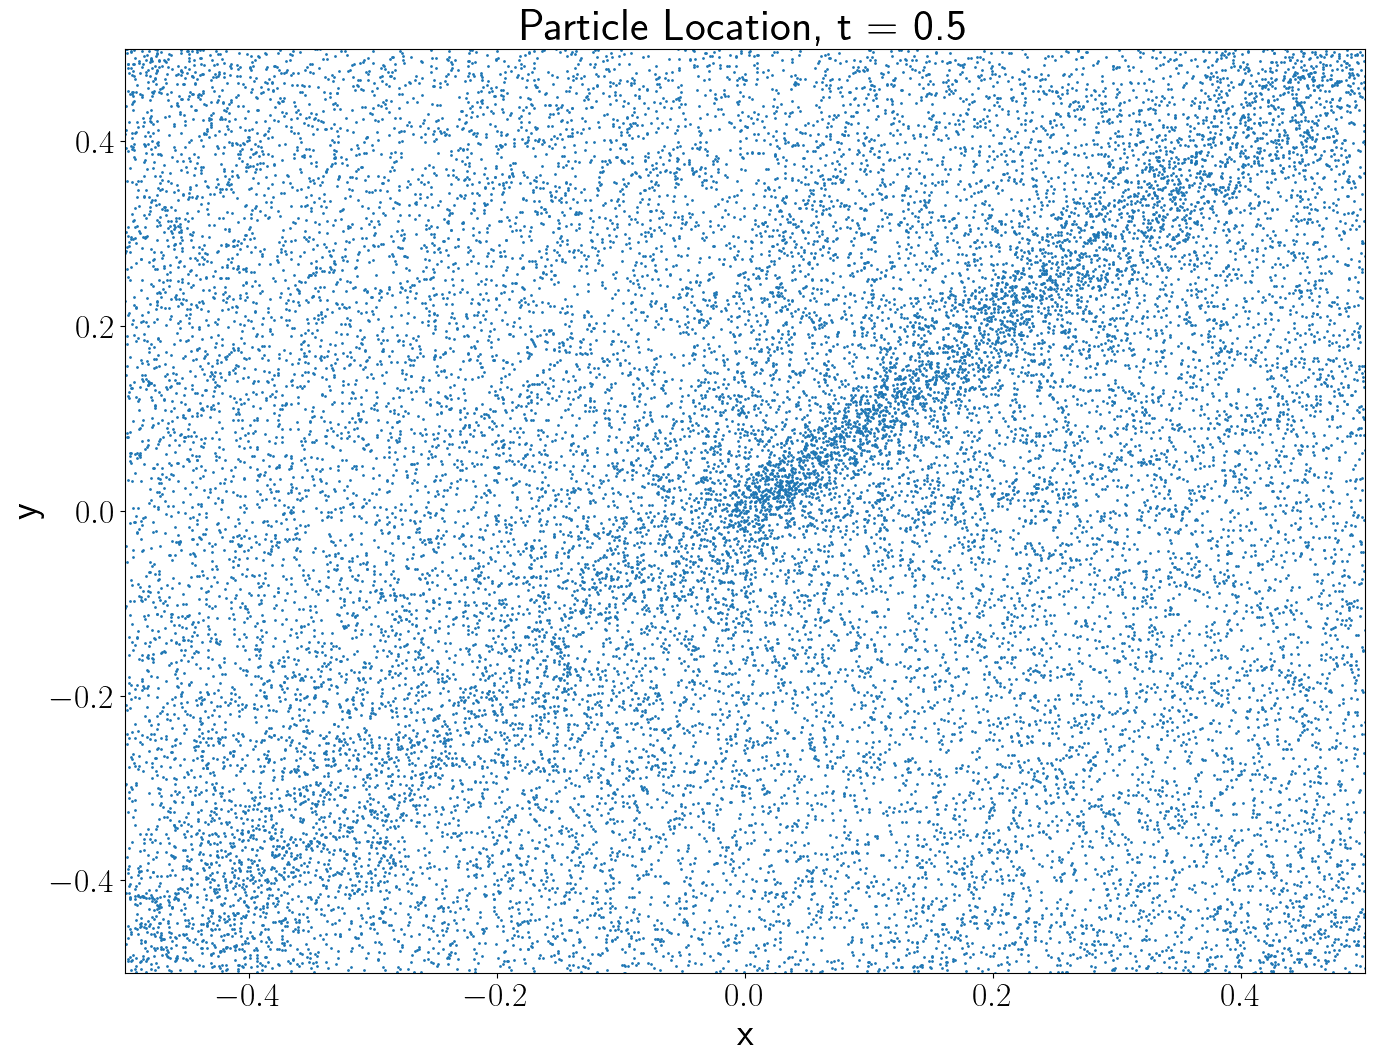

In [6]:
time = .5
plt.figure(figsize=(16, 12))
plt.scatter(x_scatter,y_scatter,s=1)
plt.xlim([-.5,.5])
plt.ylim([-.5,.5])
plt.xlabel(r"x", fontsize=labelSize)
plt.ylabel(r"y", fontsize=labelSize)
plt.title(r"Particle Location, t = " + str(time), fontsize=supTitleSize)

plt.xticks(fontsize=tickSize)
plt.yticks(fontsize=tickSize)
plt.gca().yaxis.get_offset_text().set_fontsize(tickSize)

figpath = path_64 + "\\particle_location_t_" + str(time) + "_" + update_method_folder + ".jpg"

plt.savefig(figpath)
plt.show()

In [7]:
n = 2000
particle_locations_x[::n]

[-0.436835010144822,
 -0.390794718518093,
 -0.43305864740924,
 -0.413333282949958,
 0.0344521650753352,
 -0.279061766163384,
 -0.234079105851441,
 0.130347599106131,
 0.102329849089575,
 0.0959508040617645,
 -0.376365841913579,
 0.163836669146971,
 0.160474680798628]